## A quick example of the code for generating the mask for the North Atlantic (to be further used with fpost)

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.append("../")

import pyfesom as pf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
%matplotlib notebook
from matplotlib import cm
from netCDF4 import Dataset

In [8]:
meshID='fArc'
# read the mesh
meshpath  ='/work/ab0995/a270109/fArc_2400/'
#mesh = pf.load_mesh(meshpath, abg = [50, 15, -90], get3d = False, usepickle=False)
mesh = pf.load_mesh(meshpath, abg = [0., 0., 0.], get3d = False, usepickle=False)

Load 2d part of the grid in 6 second(s)


## selecting the NA mask using multiple boxes

<IPython.core.display.Javascript object>


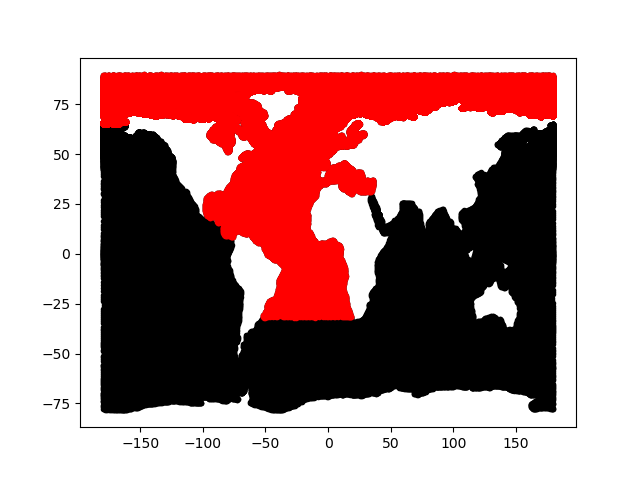

In [4]:
plt.plot(mesh.x2, mesh.y2, '.k')
ind1= (np.array(mesh.x2>-100) & np.array(mesh.x2<50)) | np.array(mesh.y2>65)
ind2=~(np.array(mesh.x2>-110) & np.array(mesh.x2<-70) & np.array(mesh.y2>-50) & np.array(mesh.y2<8))
ind3=~(np.array(mesh.x2>-80.41) & np.array(mesh.x2<-78) & np.array(mesh.y2>7) & np.array(mesh.y2<9.02))
ind4=~(np.array(mesh.x2>-110)  & np.array(mesh.x2<-81.5) & np.array(mesh.y2>7.9) & np.array(mesh.y2<8.6))
ind5=~(np.array(mesh.x2>-100.75)  & np.array(mesh.x2<-83.5) & np.array(mesh.y2>8.5) & np.array(mesh.y2<10))
ind6=~(np.array(mesh.x2>-110)  & np.array(mesh.x2<-85) & np.array(mesh.y2>9) & np.array(mesh.y2<15))
ind7=~(np.array(mesh.x2>-110)  & np.array(mesh.x2<-91) & np.array(mesh.y2>14.5) & np.array(mesh.y2<17))
ind8=~(np.array(mesh.x2>22.55)  & np.array(mesh.x2<55) & np.array(mesh.y2>-35) & np.array(mesh.y2<29.9))
ind9=~(np.array(mesh.x2>47)  & np.array(mesh.x2<51) & np.array(mesh.y2>29) & np.array(mesh.y2<31))
ind10=np.array(mesh.y2)>-32
ind=ind1&ind2&ind3&ind4&ind5&ind6&ind7&ind8&ind9&ind10
# CORE2 mesh patch
ind11=~(np.array(mesh.x2>-75)  & np.array(mesh.x2<-65) & np.array(mesh.y2>-25) & np.array(mesh.y2<-15))
ind12=~(np.array(mesh.x2>-100.5)  & np.array(mesh.x2<-99.5) & np.array(mesh.y2>16) & np.array(mesh.y2<17.5))
ind13=~(np.array(mesh.x2>-83.8)  & np.array(mesh.x2<-83.)  & np.array(mesh.y2>8.5) & np.array(mesh.y2<9.1))
ind14=~(np.array(mesh.x2>-81.5)  & np.array(mesh.x2<-80.)  & np.array(mesh.y2>8.0) & np.array(mesh.y2<8.5))
ind15=~(np.array(mesh.x2> 179.)  & np.array(mesh.x2<180.4) & np.array(mesh.y2>64.) & np.array(mesh.y2<65.5))
ind16= (np.array(mesh.x2>-80.4)  & np.array(mesh.x2<-80.)  & np.array(mesh.y2>8.8) & np.array(mesh.y2<9.1))
ind=(ind&ind11&ind12&ind13&ind14&ind15)|(ind16)

plt.plot(mesh.x2[ind], mesh.y2[ind], '.r')


## save the nodes into the file

mask=np.arange(mesh.n2d)+1 
file=open('mask_NA_'+meshID+'.dat','w') #create file  
file.write('%s\n'%(np.sum(ind)))
for i,flag in enumerate(ind):
    if flag:
        file.write('%s\n'%(mask[i]))    #assume you separate columns by tabs                 
file.close()     #close file  